In [3]:
path = r'C:\Users\user\Desktop\NLP'

In [4]:
import os
import pickle
import warnings
warnings.filterwarnings('ignore')

In [5]:
# import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')

'''Using NLTK would have been interesting because it has some good pre-process functions like Stemming/Lemming. But in the case
of spam detection, Upper/Lower case are important because some SPAM are written in CAPSLOCK.'''

'Using NLTK would have been interesting because it has some good pre-process functions like Stemming/Lemming. But in the case\nof spam detection, Upper/Lower case are important because some SPAM are written in CAPSLOCK.'

In [6]:
import numpy as np
import pandas as pd

import json

import matplotlib.pyplot as plt

import keras
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, Flatten
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split

In [7]:
from functions import plot_history

In [8]:
with open('XY.data', 'rb') as f:
    sentences_train, sentences_test, y_train, y_test = pickle.load(f)
    
sentences_train.shape, sentences_test.shape

((4179,), (1393,))

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words = 'english')
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

In [18]:
from keras.models import Sequential
from keras import layers

input_dim = X_train.shape[1]  # Number of features

def BagOfWords_NN():
    inputs = Input(name='inputs', shape=[input_dim])
    layer = Dense(20, input_dim = input_dim)(inputs)
    layer = Dense(1, activation='sigmoid')(layer)
    model = Model(inputs = inputs, outputs = layer)
    return model

model = BagOfWords_NN()
model.compile(loss='binary_crossentropy', # Binary Classification SPAM/HAM
              optimizer='adam',           # Adam optimization algorithm is an extension to stochastic gradient
              metrics=['accuracy'])       # Metrics we want to maximize
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 7188)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                143780    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 143,801
Trainable params: 143,801
Non-trainable params: 0
_________________________________________________________________


In [35]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=True,
                    validation_split = 0.2,
                    batch_size=100,
                    callbacks = [EarlyStopping(monitor = 'val_loss', min_delta = 0.001)])                 
model.save('model.BOW')

Train on 3343 samples, validate on 836 samples
Epoch 1/50
3343/3343 [==============================] - 0s 97us/step - loss: 6.8382e-04 - accuracy: 1.0000 - val_loss: 0.0700 - val_accuracy: 0.9785
Epoch 2/50
3343/3343 [==============================] - 0s 82us/step - loss: 6.6033e-04 - accuracy: 1.0000 - val_loss: 0.0703 - val_accuracy: 0.9785


In [36]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9957
Testing Accuracy:  0.9749


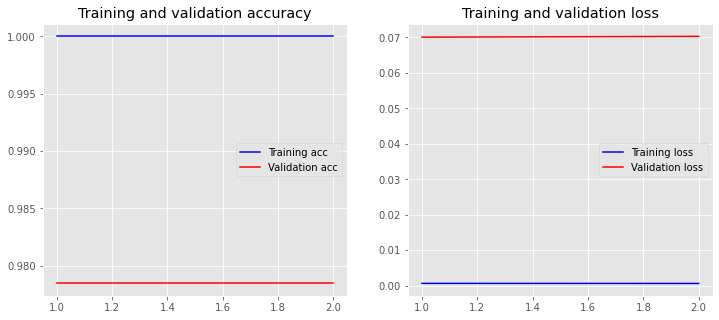

In [37]:
plot_history(history)

# **Testing with our Emails**

In [38]:
modelBOW = keras.models.load_model('model.BOW')

In [39]:
test = ["Please call our customer service representative on 0800 169 6031 between 10am-9pm as you have WON a guaranteed £1000 cash or £5000 prize!"]

test_tok  = vectorizer.transform(test)
sentiment = modelBOW.predict(test_tok,batch_size=1,verbose = 2)[0]

if sentiment > 0.5:
    label = "SPAM"
else:
    label = "HAM"

print(label, sentiment, test) 

SPAM [0.9999993] ['Please call our customer service representative on 0800 169 6031 between 10am-9pm as you have WON a guaranteed £1000 cash or £5000 prize!']
